In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os

In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as profile   # To check data distributions and correlations
import warnings     # for supressing a warning when importing large files
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]

In [ ]:
# Load Train Dataset

Train=pd.read_csv("/content/Train-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv("/content/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("/content/Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("/content/Train_Outpatientdata-1542865627584.csv")

# Load Test Dataset

Test=pd.read_csv("Test-1542969243754.csv")
Test_Beneficiarydata=pd.read_csv("Test_Beneficiarydata-1542969243754.csv")
Test_Inpatientdata=pd.read_csv("Test_Inpatientdata-1542969243754.csv")
Test_Outpatientdata=pd.read_csv("Test_Outpatientdata-1542969243754.csv")

In [ ]:
## Lets Check Shape of datasets 

print('Shape of Train data :',Train.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)

print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 25)
Shape of Train_Inpatientdata data : (40474, 30)
Shape of Train_Outpatientdata data : (517737, 27)
Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 25)
Shape of Test_Inpatientdata data : (9551, 30)
Shape of Test_Outpatientdata data : (125841, 27)


In [ ]:
## Lets check shape of Train and Test Data

print('Train Shape:',Train.shape,'\n')
print('Train Sample:\n',Train.head(2),'\n')

print('\n Test Shape:',Test.shape,'\n')
print('Test Sample: \n',Test.head(2))

Train Shape: (5410, 2) 

Train Sample:
    Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes 


 Test Shape: (1353, 1) 

Test Sample: 
    Provider
0  PRV51002
1  PRV51006


In [ ]:
## Lets check whether  providers details are unique or not in train data
print(Train.Provider.value_counts(sort=True,ascending=False).head(2))  # number of unique providers in train data.Check for duplicates

print('\n Total missing values in Train :',Train.isna().sum().sum())

print('\n Total missing values in Train :',Test.isna().sum().sum())

PRV51001    1
PRV55516    1
Name: Provider, dtype: int64

 Total missing values in Train : 0

 Total missing values in Train : 0


In [ ]:
 #Data Understanding

In [ ]:
#Lets Check missing values in each column in beneficiary data :

Train_Beneficiarydata.isna().sum()
Test_Beneficiarydata.isna().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

In [ ]:
# Lets check data types of each column in beneficiary data

Train_Beneficiarydata.dtypes
Test_Beneficiarydata.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [ ]:
## As patient can be admitted for only for 1 day,we will add 1 to the difference of Discharge Date and Admission Date 

Train_Inpatientdata['AdmissionDt'] = pd.to_datetime(Train_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatientdata['DischargeDt'] = pd.to_datetime(Train_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Train_Inpatientdata['AdmitForDays'] = ((Train_Inpatientdata['DischargeDt'] - Train_Inpatientdata['AdmissionDt']).dt.days)+1


Test_Inpatientdata['AdmissionDt'] = pd.to_datetime(Test_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpatientdata['DischargeDt'] = pd.to_datetime(Test_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Test_Inpatientdata['AdmitForDays'] = ((Test_Inpatientdata['DischargeDt'] - Test_Inpatientdata['AdmissionDt']).dt.days)+1
## Lets check Min and Max values of AdmitforDays column in Train and Test.
print('Min AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.max())
Train_Inpatientdata.AdmitForDays.isnull().sum()   #Check Null values.

print('Min AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.max())
Test_Inpatientdata.AdmitForDays.isnull().sum()   #Check Null values.

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36
Min AdmitForDays Test:-  1
Max AdmitForDays Test:-  36


0

In [ ]:
## Lets merge All patient data with beneficiary details data based on 'BeneID' as joining key for inner join
Train_AllPatientDetailsdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

Test_AllPatientDetailsdata=pd.merge(Test_Allpatientdata,Test_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

In [ ]:
### Lets check missing value percentage in full datasets

#print('Percent missing values in Train Provider with patient details data :\n')
Train_ProviderWithPatientDetailsdata.isnull().sum()*100/len(Train_ProviderWithPatientDetailsdata)


print('Percent missing values in Test Provider with patient details data :\n')
Test_ProviderWithPatientDetailsdata.isnull().sum()*100/len(Test_ProviderWithPatientDetailsdata)

Percent missing values in Test Provider with patient details data :



Provider                             0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                  90.603581
ClmDiagnosisCode_9                  92.705625
ClmDiagnosisCode_10                 99.150615
ClmProcedureCode_1                  95.962095
ClmProcedureCode_2                  99.067153
ClmProcedureCode_3                

EDA

Percent Distribution of Potential Fraud class:- 
 No     61.878931
Yes    38.121069
Name: PotentialFraud, dtype: float64


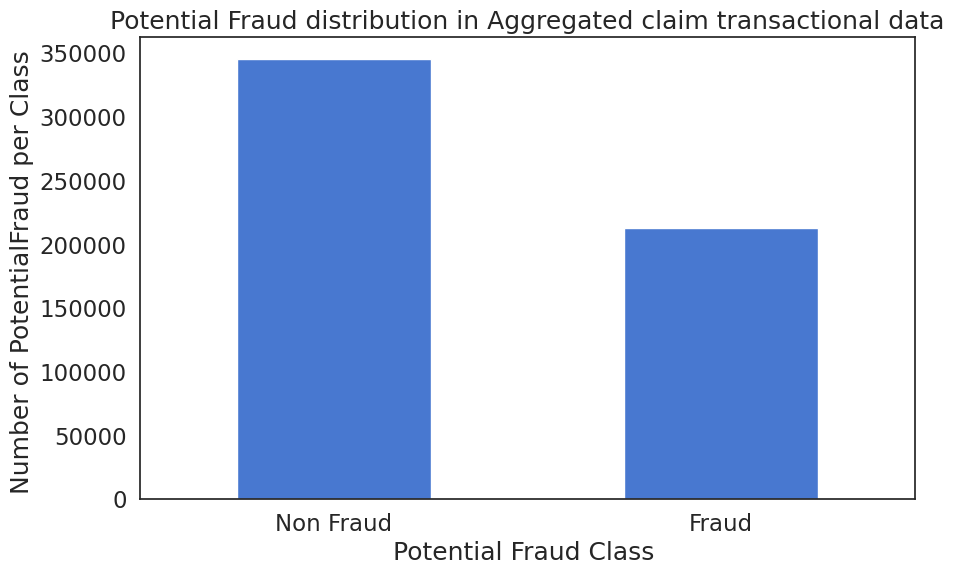

In [ ]:

sns.set_style('white',rc={'figure.figsize':(12,8)})
count_classes = pd.value_counts(Train_ProviderWithPatientDetailsdata['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud class:- \n",count_classes*100/len(Train_ProviderWithPatientDetailsdata))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0,figsize=(10,6))

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in Aggregated claim transactional data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud per Class ")

plt.savefig('PotentialFraudDistributionInMergedData')

Percent Distribution of Potential Fraud class:- 
 No     90.64695
Yes     9.35305
Name: PotentialFraud, dtype: float64


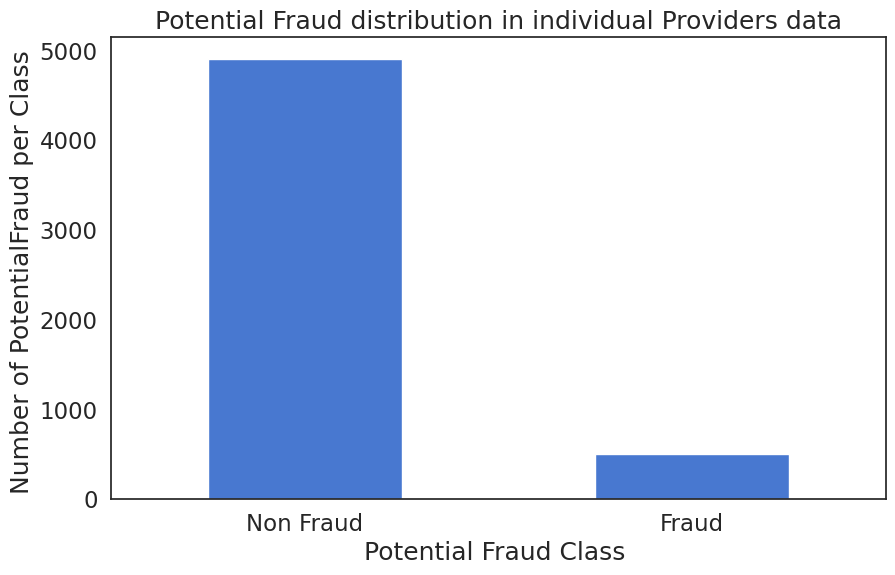

In [ ]:
#PLotting the frequencies of fraud and non-fraud transactions in the train data

count_classes_provider = pd.value_counts(Train['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud class:- \n",count_classes_provider*100/len(Train))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes_provider.plot(kind = 'bar', rot=0,figsize=(10,6))

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in individual Providers data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud per Class ")


plt.savefig('PotentialFraudDistributionImbalance')

ValueError: ignored

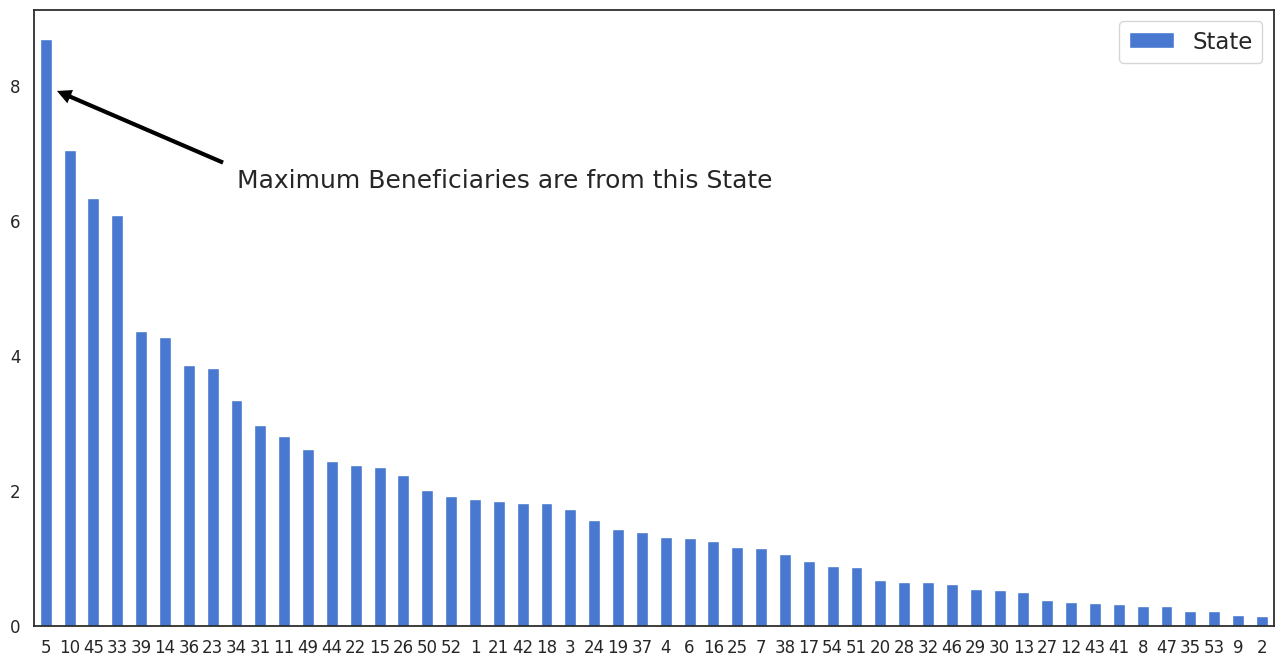

In [ ]:
#State - wise Percent Beneficiary Distribution
count_States = pd.value_counts(Train_Beneficiarydata['State'], sort = True)
#print("Percent Distribution of Beneficieries per state:- \n",count_States*100/len(Train_Beneficiarydata))

#Drawing a barplot
(count_States*100/len(Train_Beneficiarydata)).plot(kind = 'bar', rot=0,figsize=(16,8),fontsize=12,legend=True)

#Giving titles and labels to the plot

plt.annotate('Maximum Beneficiaries are from this State', xy=(0.01,8), xytext=(8, 6.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.yticks(np.arange(0,10,2), ('0 %','2 %', '4 %', '6 %', '8 %', '10%'))
plt.title("State - wise Beneficiary Distribution",fontsize=18)
plt.xlabel("State Number",fontsize=15)
plt.ylabel("Percentage of Beneficiaries "'%',fontsize=15)
plt.show()

plt.savefig('StateWiseBeneficiaryDistribution')

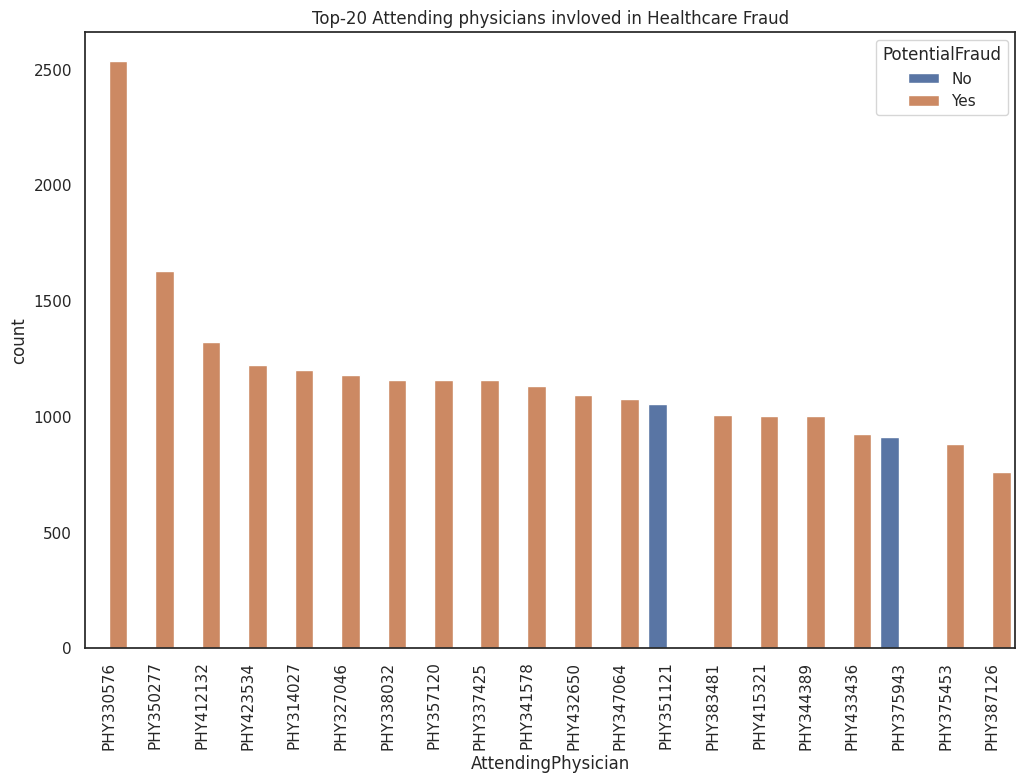

<Figure size 1200x800 with 0 Axes>

In [ ]:
### lets plot Top-20 Attending Physicians invloved in Healthcare Fraud 

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax= sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=Train_ProviderWithPatientDetailsdata
              ,order=Train_ProviderWithPatientDetailsdata.AttendingPhysician.value_counts().iloc[:20].index)

    
plt.title('Top-20 Attending physicians invloved in Healthcare Fraud')
plt.xticks(rotation=90)
plt.show()

plt.savefig('TopAttendingphysiciansinvlovedinHealthcareFraud')

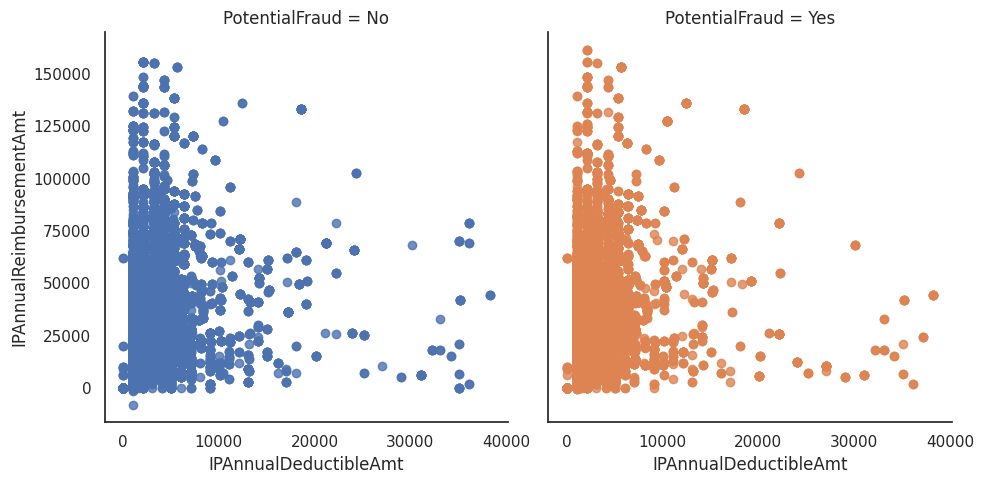

In [ ]:
## Lets Plot IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non Fraud Categoories

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=Train_ProviderWithPatientDetailsdata)


#plt.title('IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non Fraud Categoories')

plt.savefig('IPAnnualDeductibleAmtandIPAnnualReimbursementAmtinbothfraudandnonFraud')


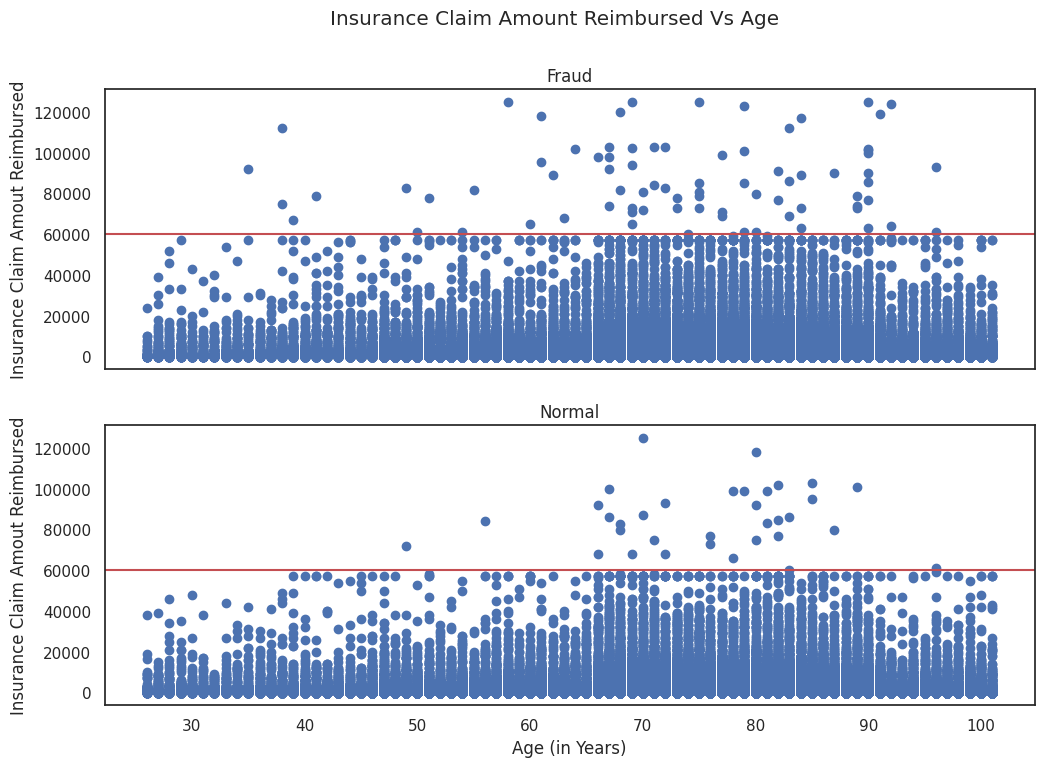

In [ ]:
## Let's See Insurance Claim Amount Reimbursed Vs Age
sns.set(rc={'figure.figsize':(12,8)},style='white')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Insurance Claim Amount Reimbursed Vs Age')

ax1.scatter(Train_ProviderWithPatientDetailsdata[Train_ProviderWithPatientDetailsdata.PotentialFraud=='Yes'].Age, 
            Train_ProviderWithPatientDetailsdata[Train_ProviderWithPatientDetailsdata.PotentialFraud=='Yes'].InscClaimAmtReimbursed)
ax1.set_title('Fraud')
ax1.axhline(y=60000,c='r')
ax1.set_ylabel('Insurance Claim Amout Reimbursed')

ax2.scatter(Train_ProviderWithPatientDetailsdata[Train_ProviderWithPatientDetailsdata.PotentialFraud=='No'].Age, 
            Train_ProviderWithPatientDetailsdata[Train_ProviderWithPatientDetailsdata.PotentialFraud=='No'].InscClaimAmtReimbursed)
ax2.set_title('Normal')
ax2.axhline(y=60000,c='r')
ax2.set_xlabel('Age (in Years)')
ax2.set_ylabel('Insurance Claim Amout Reimbursed')

plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
Train

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [ ]:
Train_Outpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
Train_Inpatientdata


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Train_Beneficiarydata


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [ ]:
Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [ ]:
Train_Allpatientdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,on="BeneID")

In [ ]:
Train_Allpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,2,1,1,1,1,2,0,0,1810,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE158968,CLM36721,2009-02-02,2009-02-07,PRV56335,8000,PHY346834,PHY376714,NaN,4552,...,1,2,2,2,2,2,9500,1568,0,0
558207,BENE158970,CLM44251,2009-03-26,2009-03-31,PRV52019,7000,PHY337065,NaN,NaN,25080,...,2,1,1,1,2,1,7000,1068,1290,740
558208,BENE159064,CLM72015,2009-10-14,2009-10-23,PRV52135,22000,PHY315112,NaN,NaN,V5789,...,2,1,2,2,2,2,22000,1068,0,0
558209,BENE159103,CLM58155,2009-07-02,2009-07-04,PRV53923,4000,PHY420889,PHY428043,NaN,4580,...,1,2,1,1,2,2,4000,1068,0,0


In [ ]:
Train_Allpatientdata.shape

(558211, 54)

In [ ]:
df=pd.merge(Train_Allpatientdata,Train,on='Provider')

PRE procesing

In [ ]:
df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE57978,CLM37910,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,...,1,1,2,1,2,2200,2136,30,100,No
558207,BENE80245,CLM79653,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,...,1,2,2,2,2,4000,1068,0,0,No
558208,BENE85177,CLM77745,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,...,2,1,2,2,2,8000,1068,0,0,No
558209,BENE105577,CLM53155,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,...,1,1,2,2,2,5000,1068,0,0,No


In [ ]:
df=df.drop(['BeneID','ClaimID'],axis=1)
df

,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,...,2,2,2,2,2,0,0,30,50,Yes
1,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,...,1,1,1,1,2,0,0,1810,760,Yes
2,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,...,1,1,1,1,2,0,0,1810,760,Yes
3,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,NaN,...,1,1,1,1,2,0,0,1810,760,Yes
4,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,2449,...,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,41401,5859,...,1,1,2,1,2,2200,2136,30,100,No
558207,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,3129,25000,...,1,2,2,2,2,4000,1068,0,0,No
558208,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,5119,4240,...,2,1,2,2,2,8000,1068,0,0,No
558209,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,25000,5715,...,1,1,2,2,2,5000,1068,0,0,No


In [ ]:
df=df.drop(['ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7',
                'ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10',
                'ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4',
                'ClmProcedureCode_5','ClmProcedureCode_6',],axis=1)

In [ ]:
df


,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,DeductibleAmtPaid,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,0.0,...,2,2,2,2,2,0,0,30,50,Yes
1,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,0.0,...,1,1,1,1,2,0,0,1810,760,Yes
2,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,0.0,...,1,1,1,1,2,0,0,1810,760,Yes
3,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,0.0,...,1,1,1,1,2,0,0,1810,760,Yes
4,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,0.0,...,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,41401,1068.0,...,1,1,2,1,2,2200,2136,30,100,No
558207,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,3129,1068.0,...,1,2,2,2,2,4000,1068,0,0,No
558208,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,5119,1068.0,...,2,1,2,2,2,8000,1068,0,0,No
558209,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,25000,1068.0,...,1,1,2,2,2,5000,1068,0,0,No


In [ ]:
df.isna().sum()  

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer             

In [ ]:
data=df
df = pd.DataFrame()
data.isna().sum()

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer             

In [ ]:
startdate= pd.to_datetime( data["AdmissionDt"] )
enddate= pd.to_datetime( data["DischargeDt"] )

pe = ( enddate - startdate).dt.days
df["Hperiod"] = pe
df['claim']=data['InscClaimAmtReimbursed']

In [ ]:
startdate= pd.to_datetime( data["ClaimStartDt"] )
enddate= pd.to_datetime( data["ClaimEndDt"] )

p = ( enddate - startdate).dt.days
df["period"] = p


In [ ]:
def physician_same(row):
    atten_oper=row["AttendingPhysician"]==row["OperatingPhysician"]
    oper_other=row["OperatingPhysician"]==row["OtherPhysician"]
    atten_other=row["AttendingPhysician"]==row["OtherPhysician"]
    if atten_oper==True and oper_other==True:# atten = oper = other
        return 0
    elif atten_oper==True and oper_other==False:# atten = oper != other
        return 1
    elif atten_oper==False and oper_other==True:# atten != oper = other
        return 2
    else:# atten != oper != other
        return 3
    
phy_same=data.apply(physician_same,axis=1)
df['phy_same']=phy_same


In [ ]:
from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()
  

data['PotentialFraud']= label_encoder.fit_transform(data['PotentialFraud'])
  
data['PotentialFraud'].unique()

array([1, 0])

In [ ]:
data['PotentialFraud'].sum()       ## The target variable is balanced in both categories


212796

In [ ]:
data['Gender']

0         2
1         1
2         1
3         1
4         1
         ..
558206    2
558207    1
558208    1
558209    2
558210    2
Name: Gender, Length: 558211, dtype: int64

In [ ]:
df

,Hperiod,claim,period,phy_same
0,NaN,30,0,3
1,NaN,40,0,3
2,NaN,200,0,3
3,NaN,20,0,3
4,NaN,40,0,3
...,...,...,...,...
558206,5.0,0,5,3
558207,3.0,4000,3,3
558208,8.0,8000,8,3
558209,3.0,5000,3,3


In [ ]:
from sklearn.preprocessing import OneHotEncoder     # One Hot Encoding 

In [ ]:
encoder = OneHotEncoder()
one_hot = encoder.fit_transform(data[['Gender']]).toarray()

# create a new DataFrame with the encoded data
df = pd.concat([df, pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(['Gender']))], axis=1)

# display the encoded DataFrame
print(df)


        Hperiod  claim  period  phy_same  Gender_1  Gender_2
0           NaN     30       0         3       0.0       1.0
1           NaN     40       0         3       1.0       0.0
2           NaN    200       0         3       1.0       0.0
3           NaN     20       0         3       1.0       0.0
4           NaN     40       0         3       1.0       0.0
...         ...    ...     ...       ...       ...       ...
558206      5.0      0       5         3       0.0       1.0
558207      3.0   4000       3         3       1.0       0.0
558208      8.0   8000       8         3       1.0       0.0
558209      3.0   5000       3         3       0.0       1.0
558210      8.0   3000       8         3       0.0       1.0

[558211 rows x 6 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

# specify the columns to scale
columns_to_scale = ['claim']

# fit the scaler to the selected columns and transform them
scaled_data = scaler.fit_transform(df[columns_to_scale])

# create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# merge the scaled columns with the remaining columns in the original DataFrame
df= pd.concat([df_scaled, df.drop(columns_to_scale, axis=1)], axis=1)

# display the scaled DataFrame
print(df)

           claim  Hperiod  period  phy_same  Gender_1  Gender_2
0      -0.253043      NaN       0         3       0.0       1.0
1      -0.250426      NaN       0         3       1.0       0.0
2      -0.208558      NaN       0         3       1.0       0.0
3      -0.255660      NaN       0         3       1.0       0.0
4      -0.250426      NaN       0         3       1.0       0.0
...          ...      ...     ...       ...       ...       ...
558206 -0.260893      5.0       5         3       0.0       1.0
558207  0.785807      3.0       3         3       1.0       0.0
558208  1.832508      8.0       8         3       1.0       0.0
558209  1.047483      3.0       3         3       0.0       1.0
558210  0.524132      8.0       8         3       0.0       1.0

[558211 rows x 6 columns]


In [ ]:
df["Gender"]=data["Gender"].replace({2:0})
df

,claim,Hperiod,period,phy_same,Gender_1,Gender_2,Gender
0,-0.253043,NaN,0,3,0.0,1.0,0
1,-0.250426,NaN,0,3,1.0,0.0,1
2,-0.208558,NaN,0,3,1.0,0.0,1
3,-0.255660,NaN,0,3,1.0,0.0,1
4,-0.250426,NaN,0,3,1.0,0.0,1
...,...,...,...,...,...,...,...
558206,-0.260893,5.0,5,3,0.0,1.0,0
558207,0.785807,3.0,3,3,1.0,0.0,1
558208,1.832508,8.0,8,3,1.0,0.0,1
558209,1.047483,3.0,3,3,0.0,1.0,0


In [ ]:
df["RenalDiseaseIndicator"]=data["RenalDiseaseIndicator"].replace({"Y":1})
birthdate=pd.to_datetime(data["DOB"])
enddate=pd.to_datetime(data["DOD"])

# cheack whether the patient dead or alive
def alife_function(value):
    if value==True:
        return 1
    else:
        return 0
alive = pd.isna(enddate).apply(alife_function)


# get the age of patient
max_date=enddate.dropna().max()
enddate[pd.isna(enddate)]=max_date
period=(((enddate-birthdate).dt.days/356).astype(int))

df["age"]=period
df["alife"]=alive

In [ ]:
data.isna().sum()

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer             

In [ ]:
from pandas.api.types import is_numeric_dtype
for i in df.columns:
  print(f"{i }:",is_numeric_dtype(df
[i]))

claim: True
Hperiod: True
period: True
phy_same: True
Gender_1: True
Gender_2: True
Gender: True
RenalDiseaseIndicator: False
age: True
alife: True


In [ ]:
columns=['NoOfMonths_PartACov','NoOfMonths_PartBCov','ChronicCond_Alzheimer','ChronicCond_Alzheimer','ChronicCond_KidneyDisease','ChronicCond_Cancer',
         'ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart',
         'ChronicCond_stroke','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','DeductibleAmtPaid','PotentialFraud']
df['Provider']= label_encoder.fit_transform(data['Provider'])
  
df['Provider'].unique()

array([4004, 5280, 5269, ..., 2810,  185, 2016])

In [ ]:
for i in columns:
    df[i]=data[i]
df['Provider']=df['Provider']
df.columns

Index(['claim', 'Hperiod', 'period', 'phy_same', 'Gender_1', 'Gender_2',
       'Gender', 'RenalDiseaseIndicator', 'age', 'alife', 'Provider',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_stroke', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'DeductibleAmtPaid', 'PotentialFraud'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns', None)
print(df)

           claim  Hperiod  period  phy_same  Gender_1  Gender_2  Gender  \
0      -0.253043      NaN       0         3       0.0       1.0       0   
1      -0.250426      NaN       0         3       1.0       0.0       1   
2      -0.208558      NaN       0         3       1.0       0.0       1   
3      -0.255660      NaN       0         3       1.0       0.0       1   
4      -0.250426      NaN       0         3       1.0       0.0       1   
...          ...      ...     ...       ...       ...       ...     ...   
558206 -0.260893      5.0       5         3       0.0       1.0       0   
558207  0.785807      3.0       3         3       1.0       0.0       1   
558208  1.832508      8.0       8         3       1.0       0.0       1   
558209  1.047483      3.0       3         3       0.0       1.0       0   
558210  0.524132      8.0       8         3       0.0       1.0       0   

       RenalDiseaseIndicator  age  alife  Provider  NoOfMonths_PartACov  \
0                       

In [ ]:
df

,claim,Hperiod,period,phy_same,Gender_1,Gender_2,Gender,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,PotentialFraud
0,-0.253043,NaN,0,3,0.0,1.0,0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2,30,50,0.0,1
1,-0.250426,NaN,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
2,-0.208558,NaN,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
3,-0.255660,NaN,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
4,-0.250426,NaN,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.260893,5.0,5,3,0.0,1.0,0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2,30,100,1068.0,0
558207,0.785807,3.0,3,3,1.0,0.0,1,1,68,1,567,12,12,1,2,2,2,2,1,2,2,0,0,1068.0,0
558208,1.832508,8.0,8,3,1.0,0.0,1,0,74,1,2810,12,12,2,2,2,2,2,2,1,2,0,0,1068.0,0
558209,1.047483,3.0,3,3,0.0,1.0,0,0,84,1,185,12,0,1,2,2,2,2,1,1,2,0,0,1068.0,0


In [ ]:
scaler = StandardScaler()

# specify the columns to scale
columns_to_scale = ['OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','DeductibleAmtPaid']

# fit the scaler to the selected columns and transform them
scaled_data = scaler.fit_transform(df[columns_to_scale])

# create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# merge the scaled columns with the remaining columns in the original DataFrame
df= pd.concat([df_scaled, df.drop(columns_to_scale, axis=1)], axis=1)

# display the scaled DataFrame
print(df)


        OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  DeductibleAmtPaid  \
0                      -0.579164              -0.598490          -0.286191   
1                      -0.120619               0.110079          -0.286191   
2                      -0.120619               0.110079          -0.286191   
3                      -0.120619               0.110079          -0.286191   
4                      -0.120619               0.110079          -0.286191   
...                          ...                    ...                ...   
558206                 -0.579164              -0.548591           3.611384   
558207                 -0.586893              -0.648389           3.611384   
558208                 -0.586893              -0.648389           3.611384   
558209                 -0.586893              -0.648389           3.611384   
558210                 -0.586893              -0.648389           3.611384   

           claim  Hperiod  period  phy_same  Gender_1  Gender_2

In [ ]:
df

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,Hperiod,period,phy_same,Gender_1,Gender_2,Gender,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,PotentialFraud
0,-0.579164,-0.598490,-0.286191,-0.253043,NaN,0,3,0.0,1.0,0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2,1
1,-0.120619,0.110079,-0.286191,-0.250426,NaN,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
2,-0.120619,0.110079,-0.286191,-0.208558,NaN,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
3,-0.120619,0.110079,-0.286191,-0.255660,NaN,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
4,-0.120619,0.110079,-0.286191,-0.250426,NaN,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.579164,-0.548591,3.611384,-0.260893,5.0,5,3,0.0,1.0,0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2,0
558207,-0.586893,-0.648389,3.611384,0.785807,3.0,3,3,1.0,0.0,1,1,68,1,567,12,12,1,2,2,2,2,1,2,2,0
558208,-0.586893,-0.648389,3.611384,1.832508,8.0,8,3,1.0,0.0,1,0,74,1,2810,12,12,2,2,2,2,2,2,1,2,0
558209,-0.586893,-0.648389,3.611384,1.047483,3.0,3,3,0.0,1.0,0,0,84,1,185,12,0,1,2,2,2,2,1,1,2,0


In [ ]:
df=df.drop(['Hperiod'],axis=1)

In [ ]:
df = df.drop_duplicates()
df.shape[0]

542151

In [ ]:
Y=df['PotentialFraud']

X=df.iloc[:,:-1]
X.isna().sum()

OPAnnualReimbursementAmt        0
OPAnnualDeductibleAmt           0
DeductibleAmtPaid             899
claim                           0
period                          0
phy_same                        0
Gender_1                        0
Gender_2                        0
Gender                          0
RenalDiseaseIndicator           0
age                             0
alife                           0
Provider                        0
NoOfMonths_PartACov             0
NoOfMonths_PartBCov             0
ChronicCond_Alzheimer           0
ChronicCond_KidneyDisease       0
ChronicCond_Cancer              0
ChronicCond_ObstrPulmonary      0
ChronicCond_Depression          0
ChronicCond_Diabetes            0
ChronicCond_IschemicHeart       0
ChronicCond_stroke              0
dtype: int64

In [ ]:
X=X.fillna(0)

In [ ]:
X

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,Gender_1,Gender_2,Gender,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke
0,-0.579164,-0.598490,-0.286191,-0.253043,0,3,0.0,1.0,0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2
1,-0.120619,0.110079,-0.286191,-0.250426,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
2,-0.120619,0.110079,-0.286191,-0.208558,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
3,-0.120619,0.110079,-0.286191,-0.255660,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
6,-0.120619,0.110079,-0.286191,-0.245193,20,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.579164,-0.548591,3.611384,-0.260893,5,3,0.0,1.0,0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2
558207,-0.586893,-0.648389,3.611384,0.785807,3,3,1.0,0.0,1,1,68,1,567,12,12,1,2,2,2,2,1,2,2
558208,-0.586893,-0.648389,3.611384,1.832508,8,3,1.0,0.0,1,0,74,1,2810,12,12,2,2,2,2,2,2,1,2
558209,-0.586893,-0.648389,3.611384,1.047483,3,3,0.0,1.0,0,0,84,1,185,12,0,1,2,2,2,2,1,1,2


In [ ]:
df

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,Gender_1,Gender_2,Gender,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,PotentialFraud
0,-0.579164,-0.598490,-0.286191,-0.253043,0,3,0.0,1.0,0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2,1
1,-0.120619,0.110079,-0.286191,-0.250426,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
2,-0.120619,0.110079,-0.286191,-0.208558,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
3,-0.120619,0.110079,-0.286191,-0.255660,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
6,-0.120619,0.110079,-0.286191,-0.245193,20,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.579164,-0.548591,3.611384,-0.260893,5,3,0.0,1.0,0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2,0
558207,-0.586893,-0.648389,3.611384,0.785807,3,3,1.0,0.0,1,1,68,1,567,12,12,1,2,2,2,2,1,2,2,0
558208,-0.586893,-0.648389,3.611384,1.832508,8,3,1.0,0.0,1,0,74,1,2810,12,12,2,2,2,2,2,2,1,2,0
558209,-0.586893,-0.648389,3.611384,1.047483,3,3,0.0,1.0,0,0,84,1,185,12,0,1,2,2,2,2,1,1,2,0


In [ ]:
X

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,Gender_1,Gender_2,Gender,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke
0,-0.579164,-0.598490,-0.286191,-0.253043,0,3,0.0,1.0,0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2
1,-0.120619,0.110079,-0.286191,-0.250426,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
2,-0.120619,0.110079,-0.286191,-0.208558,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
3,-0.120619,0.110079,-0.286191,-0.255660,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
6,-0.120619,0.110079,-0.286191,-0.245193,20,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.579164,-0.548591,3.611384,-0.260893,5,3,0.0,1.0,0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2
558207,-0.586893,-0.648389,3.611384,0.785807,3,3,1.0,0.0,1,1,68,1,567,12,12,1,2,2,2,2,1,2,2
558208,-0.586893,-0.648389,3.611384,1.832508,8,3,1.0,0.0,1,0,74,1,2810,12,12,2,2,2,2,2,2,1,2
558209,-0.586893,-0.648389,3.611384,1.047483,3,3,0.0,1.0,0,0,84,1,185,12,0,1,2,2,2,2,1,1,2


In [ ]:
Y.sum()

204797

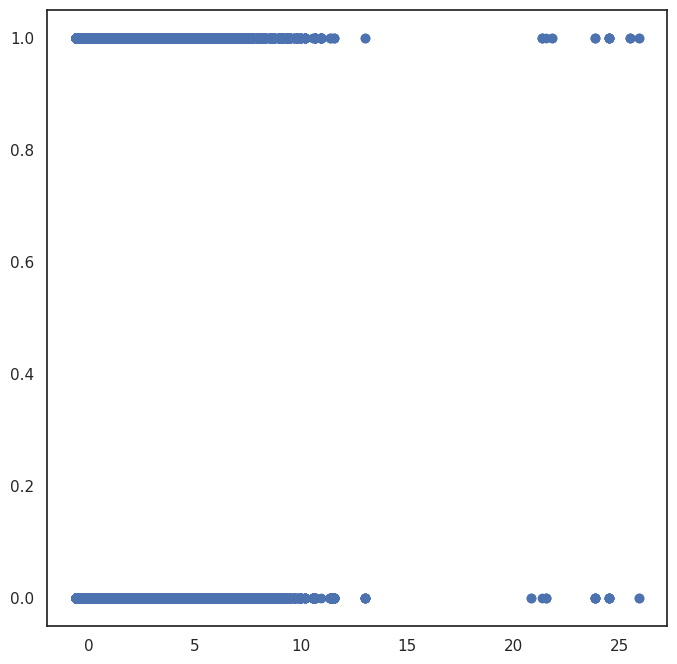

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X['OPAnnualReimbursementAmt'],Y)

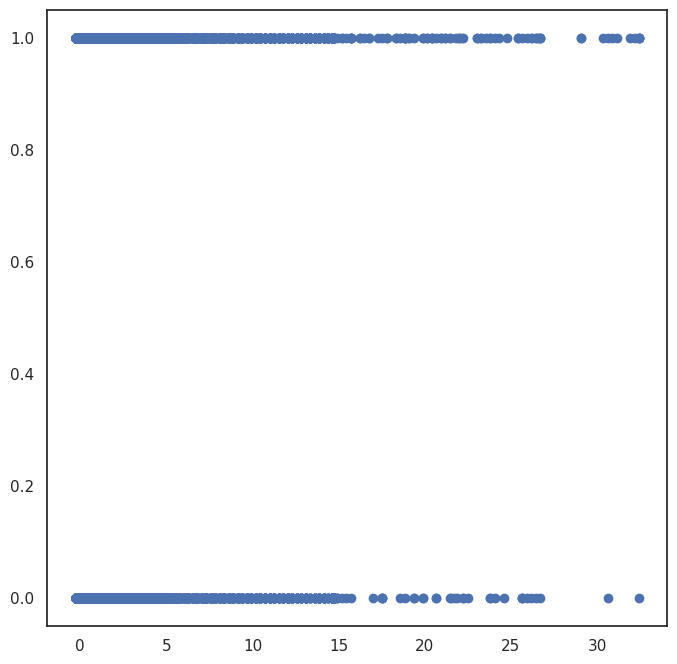

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X['claim'],Y)

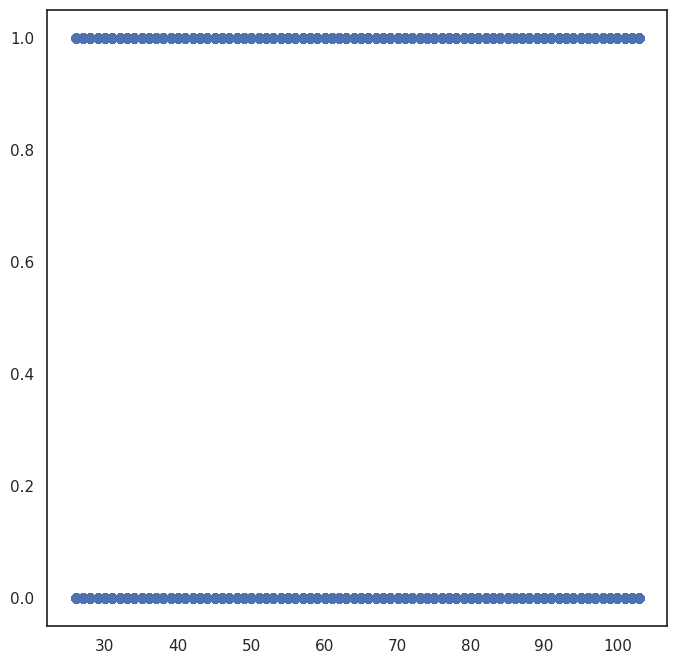

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X['age'],Y)

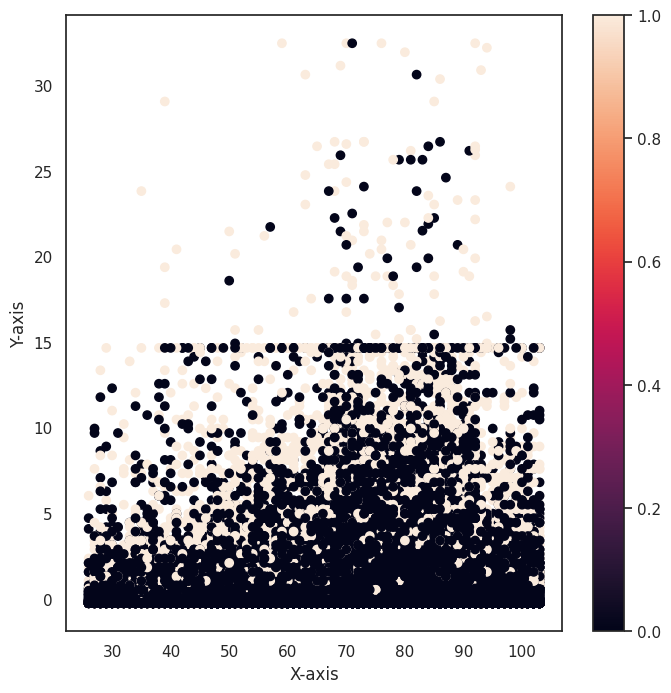

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X['age'],X['claim'],c=Y)
    # add a colorbar to the plot
plt.colorbar()

            # set the labels for the axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2



scaler = MinMaxScaler()
x = scaler.fit_transform(X)
# perform univariate feature selection using chi-squared test
X_new = SelectKBest(chi2, k=4).fit_transform(x, Y)

# print the selected features
print(X_new.shape)

(542151, 4)


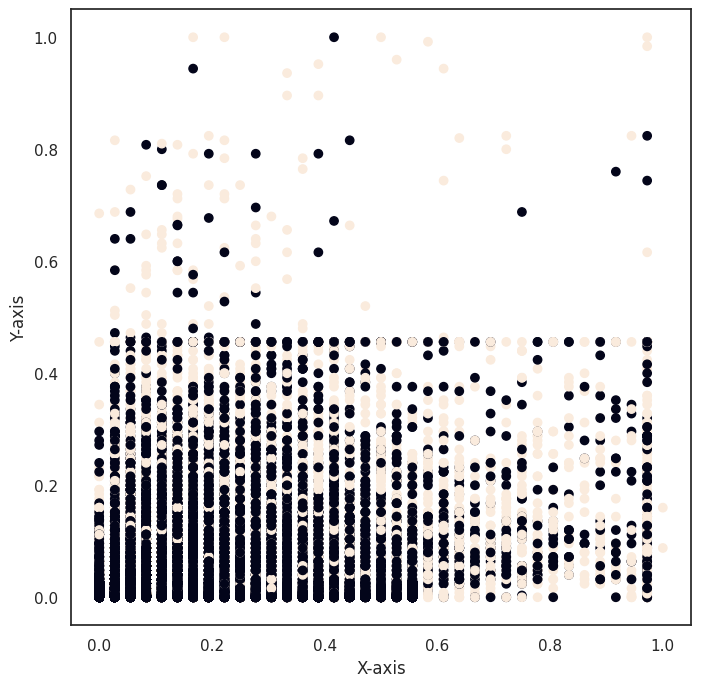

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X_new[:,2],X_new[:,1],c=Y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')


plt.show()

In [ ]:
X_new

array([[0.00000000e+00, 2.40000000e-04, 0.00000000e+00, 7.40247735e-01],
       [0.00000000e+00, 3.20000000e-04, 0.00000000e+00, 7.40247735e-01],
       [0.00000000e+00, 1.60000000e-03, 0.00000000e+00, 7.40247735e-01],
       ...,
       [1.00000000e+00, 6.40000000e-02, 2.22222222e-01, 5.19504529e-01],
       [1.00000000e+00, 4.00000000e-02, 8.33333333e-02, 3.42022555e-02],
       [1.00000000e+00, 2.40000000e-02, 2.22222222e-01, 3.72712146e-01]])

In [ ]:
Xtr,Xte,Ytr,Yte=train_test_split(X_new,Y, test_size=2/10, train_size=8/10) 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
classifier1 = LogisticRegression().fit(Xtr, Ytr)
yhat1=classifier1.predict(Xte)

In [ ]:
X= X.reset_index(drop=True)
X


,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,Gender_1,Gender_2,Gender,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke
0,-0.579164,-0.598490,-0.286191,-0.253043,0,3,0.0,1.0,0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2
1,-0.120619,0.110079,-0.286191,-0.250426,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
2,-0.120619,0.110079,-0.286191,-0.208558,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
3,-0.120619,0.110079,-0.286191,-0.255660,0,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
4,-0.120619,0.110079,-0.286191,-0.245193,20,3,1.0,0.0,1,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542146,-0.579164,-0.548591,3.611384,-0.260893,5,3,0.0,1.0,0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2
542147,-0.586893,-0.648389,3.611384,0.785807,3,3,1.0,0.0,1,1,68,1,567,12,12,1,2,2,2,2,1,2,2
542148,-0.586893,-0.648389,3.611384,1.832508,8,3,1.0,0.0,1,0,74,1,2810,12,12,2,2,2,2,2,2,1,2
542149,-0.586893,-0.648389,3.611384,1.047483,3,3,0.0,1.0,0,0,84,1,185,12,0,1,2,2,2,2,1,1,2


Logistic regresuion

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y, test_size=2/10, train_size=8/10) 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
classifier = LogisticRegression().fit(Xtrain, Ytrain)
yhat=classifier.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score  
print(f'Accuracy Score is {accuracy_score(Ytest,yhat)}')  
print(f'Precision Score is {precision_score(Ytest,yhat)}') 
print(f'Recall Score is {accuracy_score(Ytest,yhat)}') 
print(f'f1 Score is {f1_score(Ytest,yhat)}') 

Accuracy Score is 0.6351043520764357
Precision Score is 0.5920803610423643
Recall Score is 0.6351043520764357
f1 Score is 0.17052410901467505


XG Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as XG
modelxg = XG()
modelxg.fit(Xtrain, Ytrain)

GradientBoostingClassifier()

In [ ]:
y_pred = modelxg.predict(Xtest)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(Ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Precision: %.3f' % precision_score(Ytest,predictions))
print('Recall: %.3f' % recall_score(Ytest,predictions))
print('F1: %.3f' % f1_score(Ytest,predictions))


Accuracy: 79.23%
Precision: 0.821
Recall: 0.574
F1: 0.675


XG BOOST TUNNING

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [10, 50]
}
model1 = XG()

In [ ]:
grid_search = GridSearchCV(estimator=model1, param_grid=params, cv=3, n_jobs=-1)
grid_search.fit(Xtrain, Ytrain)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5, 7],
                         'n_estimators': [10, 50]})

In [ ]:
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50}
Best Score: 0.9514410188055535


In [ ]:
model1 = XG(learning_rate= 0.2 , max_depth= 7 , n_estimators= 50)
model1.fit(Xtrain, Ytrain)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=50)

In [ ]:
y_pred = model1.predict(Xtest)

predictions1 = [round(value) for value in y_pred]
accuracy = accuracy_score(Ytest, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Recall: %.3f' % recall_score(Ytest,predictions1))
print('F1: %.3f' % f1_score(Ytest,predictions1))
print('Precision: %.3f' % precision_score(Ytest,predictions1))

Accuracy: 95.09%
Recall: 0.904
F1: 0.933
Precision: 0.963


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()
X1,Y1 = undersample.fit_resample(X, Y)
Xtrain1,Xtest1,Ytrain1,Ytest1=train_test_split(X,Y, test_size=1/10, train_size=9/10) 
model2 = XG( learning_rate=0.1, max_depth=4,n_estimators=5)
model2.fit(Xtrain1, Ytrain1)

GradientBoostingClassifier(max_depth=4, n_estimators=5)

In [ ]:
y_pred = model2.predict(Xtest1)

predictions2 = [round(value) for value in y_pred]
accuracy = accuracy_score(Ytest1, predictions2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('F1: %.3f' % f1_score(Ytest1,predictions2))


Accuracy: 67.12%
F1: 0.264


In [ ]:
classifier = LogisticRegression().fit(Xtrain1, Ytrain1)
yhat=classifier.predict(Xtest1)
from sklearn.metrics import accuracy_score  
print(f'Accuracy Score is {accuracy_score(Ytest1,yhat)}') 

Accuracy Score is 0.6323963405636712


Random Forrest Tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtrain, Ytrain)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(Xtest)
accuracy = accuracy_score(Ytest, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7970875487637299


In [ ]:
print(f'Precision Score is {precision_score(Ytest,y_pred)}') 
print(f'Recall Score is {recall_score(Ytest,y_pred)}') 
print(f'F1 Score is {f1_score(Ytest,y_pred)}') 


Precision Score is 0.7865643929017136
Recall Score is 0.6328769807254292
F1 Score is 0.7014005754302155


Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
Xtrain = tf.constant(np.asarray(Xtrain), dtype=tf.float32)
Ytrain = tf.constant(np.asarray(Ytrain), dtype=tf.float32)

In [ ]:
model = Sequential(
    [               
        tf.keras.Input(shape=(23,)),    #specify input size
        
        Dense(units=30,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
        Dense(units=15,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
        Dense(units=1,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.001))
        
        
        
    ], name = "my_model" 
)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                720       
                                                                 
 dense_4 (Dense)             (None, 15)                465       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [ ]:
Xtrain 

<tf.Tensor: shape=(433720, 23), dtype=float32, numpy=
array([[-0.5843166 , -0.64838904, -0.28619105, ...,  2.        ,
         2.        ,  2.        ],
       [-0.37565285, -0.3689535 , -0.28619105, ...,  2.        ,
         2.        ,  2.        ],
       [-0.26488072,  0.88850653, -0.03073203, ...,  1.        ,
         1.        ,  2.        ],
       ...,
       [-0.5430991 ,  0.02026033, -0.28619105, ...,  2.        ,
         2.        ,  2.        ],
       [ 0.02106594, -0.5186511 ,  3.6113834 , ...,  1.        ,
         1.        ,  2.        ],
       [-0.406566  , -0.44879222, -0.03073203, ...,  2.        ,
         1.        ,  2.        ]], dtype=float32)>

In [ ]:
model.fit(Xtrain,Ytrain,epochs=6)

Epoch 1/6
13554/13554 [==============================] - 45s 3ms/step - loss: 0.9619
Epoch 2/6
13554/13554 [==============================] - 43s 3ms/step - loss: 0.8282
Epoch 3/6
13554/13554 [==============================] - 42s 3ms/step - loss: 0.7618
Epoch 4/6
13554/13554 [==============================] - 44s 3ms/step - loss: 0.7219
Epoch 5/6
13554/13554 [==============================] - 44s 3ms/step - loss: 0.6878
Epoch 6/6
13554/13554 [==============================] - 43s 3ms/step - loss: 0.6647


In [ ]:
Xtest = tf.constant(np.asarray(Xtest), dtype=tf.float32)
Ytest = tf.constant(np.asarray(Ytest), dtype=tf.float32)
prediction = model.predict(Xtest)

3389/3389 [==============================] - 5s 1ms/step


In [ ]:
prediction


array([[0.44524243],
       [0.36667016],
       [0.4650913 ],
       ...,
       [0.3537071 ],
       [0.3513255 ],
       [0.35348645]], dtype=float32)

In [ ]:
yhut=[]
for i in range(len(prediction)):
    if prediction[i] >= 0.5:
      
        yhut.append(1)
    else:                                #if threshold is high then there will be less False Positive - Prediction a good one as fraud will be more
                                        # if the threshold is low then there will be False Negative -- Prediction a good one as fraud will be less
        yhut.append(0)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print(f'Accuracy Score is {accuracy_score(Ytest,yhut)}') 
print('Precision: %.3f' % precision_score(Ytest, yhut))
print('recall: %.3f' % recall_score(Ytest, yhut))
print('f1 score: %.3f' % f1_score(Ytest, yhut))

Accuracy Score is 0.6478128948363475
Precision: 0.640
recall: 0.148
f1 score: 0.241


Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(max_depth=8,criterion="entropy",random_state=42,min_samples_split=3)

In [ ]:
clf.fit(Xtrain, Ytrain)


DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=3,
                       random_state=42)

In [ ]:
y_pred1 = clf.predict(Xtest)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print(f'Accuracy Score is {accuracy_score(Ytest,y_pred1)}') 
print('Precision: %.3f' % precision_score(Ytest, y_pred1))
print('recall: %.3f' % recall_score(Ytest, y_pred1))
print('f1 score: %.3f' % f1_score(Ytest, y_pred1))

Accuracy Score is 0.7623004491335503
Precision: 0.822
recall: 0.471
f1 score: 0.599


In [ ]:
y_pred2 = clf.predict(Xtrain)
print(f'Accuracy Score is {accuracy_score(Ytrain,y_pred2)}') 
print('Precision: %.3f' % precision_score(Ytrain, y_pred2))
print('recall: %.3f' % recall_score(Ytrain, y_pred2))
print('f1 score: %.3f' % f1_score(Ytrain, y_pred2))

Accuracy Score is 0.7615327861293
Precision: 0.822
recall: 0.471
f1 score: 0.599


In [ ]:
models = [classifier,model,clf,modelxg,model1,rf]

accuracy = []
precision = []
recall = []
f1 = []
yhut=[]
# loop through each model
for modeli in models:
    
    
    # make predictions on the test data
    y_pred = modeli.predict(Xtest)
    if(modeli==model):
        
        for i in range(len(y_pred)):
            if y_pred[i] >= 0.5:

                yhut.append(1)
            else:                                #if threshold is high then there will be less False Positive - Prediction a good one as fraud will be more
                                            # if the threshold is low then there will be False Negative -- Prediction a good one as fraud will be less
                yhut.append(0)
        y_pred=yhut
    # calculate the metric scores and append them to the corresponding list
    accuracy.append(accuracy_score(Ytest, y_pred))
    precision.append(precision_score(Ytest, y_pred))
    recall.append(recall_score(Ytest, y_pred))
    f1.append(f1_score(Ytest, y_pred))
    print(modeli)

metric_scores = {'Model': ['Logistic Regression','Neural Networks','Decision Tree','Xg Boost','Xg with Hp Tuning', 'Random Forest'],
                 'Accuracy': accuracy,
                 'Precision': precision,
                 'Recall': recall,
                 'F1-Score': f1
                }

# create a Pandas DataFrame from the dictionary
data = pd.DataFrame(metric_scores)

LogisticRegression()
3389/3389 [==============================] - 5s 2ms/step
DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=3,
                       random_state=42)
GradientBoostingClassifier()
GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=50)
RandomForestClassifier()


In [ ]:
data


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.635095,0.591515,0.100047,0.171146
1,Neural Networks,0.647813,0.639649,0.148245,0.240705
2,Decision Tree,0.762300,0.821772,0.470892,0.598711
3,Xg Boost,0.792320,0.820543,0.574025,0.675495
4,Xg with Hp Tuning,0.950881,0.963234,0.904068,0.932713
5,Random Forest,0.797088,0.786564,0.632877,0.701401
